In [1]:
%matplotlib inline
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt

# Problem Statement 2.1
Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe.
Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is. 

* Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock

* This would be helpful if we are to train our model to take NLP inputs.


In [2]:
df = pd.read_csv('D:/DS/mindtree_updated.csv')
df.head()

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Index,Month,Year,Day_Perc_Change,Trend
0,1,MINDTREE,EQ,2017-05-16,509.45,507.00,515.85,506.00,511.00,511.30,...,207011,1.061317e+08,5550,82090,39.65,1,5,2017,0.363137,Slight or No change
1,2,MINDTREE,EQ,2017-05-17,511.30,507.05,519.70,502.75,504.00,506.35,...,391401,2.004375e+08,13341,150098,38.35,2,5,2017,-0.968120,Slight Negative
2,3,MINDTREE,EQ,2017-05-18,506.35,502.00,516.75,486.00,487.50,492.90,...,852336,4.309377e+08,18513,170919,20.05,3,5,2017,-2.656265,Negative
3,4,MINDTREE,EQ,2017-05-19,492.90,491.95,502.95,489.50,495.15,497.50,...,352273,1.748782e+08,8326,57853,16.42,4,5,2017,0.933252,Slight Positive
4,5,MINDTREE,EQ,2017-05-22,497.50,499.95,511.85,497.10,501.55,502.35,...,399974,2.018999e+08,9779,107089,26.77,5,5,2017,0.974874,Slight Positive


In [3]:
#Using the pandas_profiling function of pandas to obtain and extensive preiminary report
pandas_profiling.ProfileReport(df)

Number of variables,21
Number of observations,493
Total Missing (%),0.0%
Total size in memory,81.0 KiB
Average record size in memory,168.2 B
Numeric,7
Categorical,1
Boolean,0
Date,0
Text (Unique),1
Rejected,12


In [4]:
df['Date'].dtype

dtype('O')

In [5]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date'].dtype

dtype('<M8[ns]')

In [6]:
df.set_index('Date').head()

,Unnamed: 0,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Index,Month,Year,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,,
2017-05-16,1,MINDTREE,EQ,509.45,507.00,515.85,506.00,511.00,511.30,512.69,207011,1.061317e+08,5550,82090,39.65,1,5,2017,0.363137,Slight or No change
2017-05-17,2,MINDTREE,EQ,511.30,507.05,519.70,502.75,504.00,506.35,512.10,391401,2.004375e+08,13341,150098,38.35,2,5,2017,-0.968120,Slight Negative
2017-05-18,3,MINDTREE,EQ,506.35,502.00,516.75,486.00,487.50,492.90,505.60,852336,4.309377e+08,18513,170919,20.05,3,5,2017,-2.656265,Negative
2017-05-19,4,MINDTREE,EQ,492.90,491.95,502.95,489.50,495.15,497.50,496.43,352273,1.748782e+08,8326,57853,16.42,4,5,2017,0.933252,Slight Positive
2017-05-22,5,MINDTREE,EQ,497.50,499.95,511.85,497.10,501.55,502.35,504.78,399974,2.018999e+08,9779,107089,26.77,5,5,2017,0.974874,Slight Positive


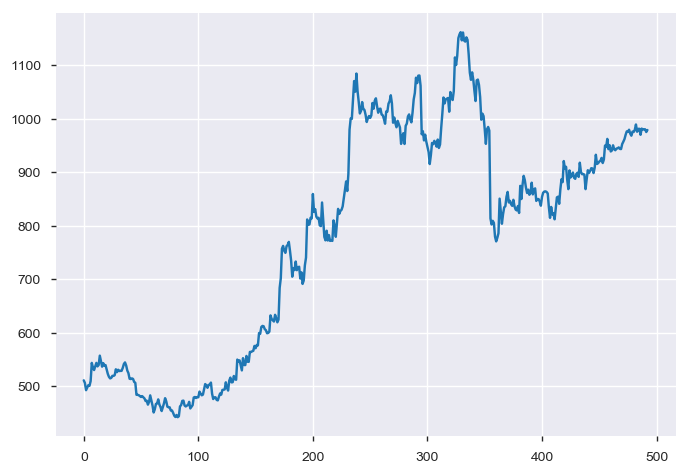

In [7]:
df['Close Price'].plot()
plt.show()

# Problem Statement 2.2

A stem plot is a discrete series plot, ideal for plotting daywise data. It can be plotted using the plt.stem() function.

Display a stem plot of the daily change in of the stock price in percentage. This column was calculated in module 1 and should be already available in week2.csv. Observe whenever there's a large change.

In [8]:
date = df['Date']
dpc = df['Day_Perc_Change']
ttc = df['Total Traded Quantity']

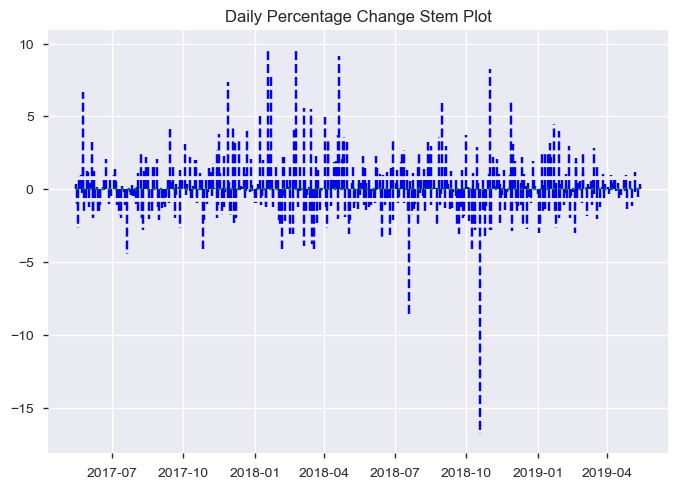

In [9]:
a = plt.stem(date, dpc, markerfmt = 'b ', linefmt = 'b--', basefmt = 'g:')
plt.title('Daily Percentage Change Stem Plot')
plt.show()

# Problem Statement 2.3

Plot the daily volumes as well and compare the percentage stem plot to it. Document your analysis of the relationship between volume and daily percentage change. 

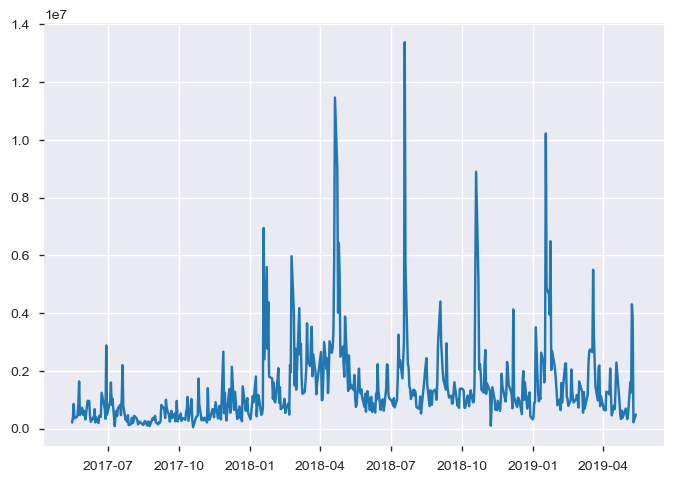

In [10]:
b = plt.plot(date, ttc)

In [11]:
x = df['Date']
y1 = df['Day_Perc_Change']
y2 = df['Total Traded Quantity']

C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


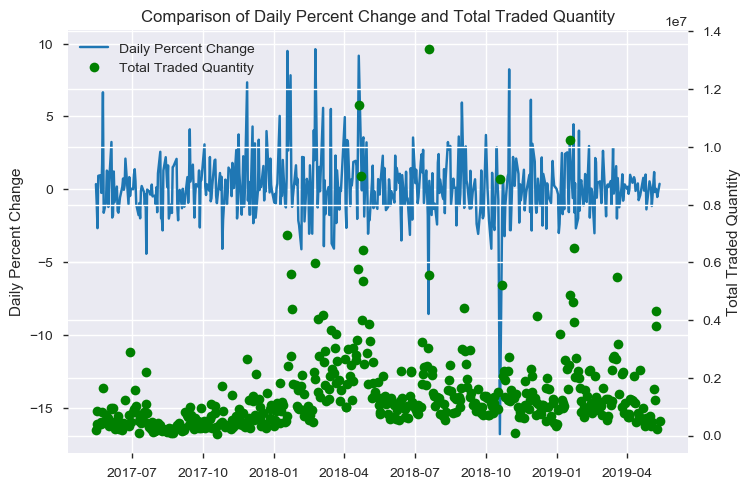

In [12]:
fig = plt.figure()
plt.title('Comparison of Daily Percent Change and Total Traded Quantity')
host = fig.add_subplot(111)
par = host.twinx() #to create a parralel y axis
host.set_ylabel('Daily Percent Change')
par.set_ylabel('Total Traded Quantity')
line1, = host.plot(x, y1)
line2, = par.plot(x, y2, 'go')
host.legend([line1, line2], ['Daily Percent Change', 'Total Traded Quantity'])
plt.show()

# Problem Statement 2.4
We had created a Trend column in module 1. We want to see how often each Trend type occurs. This can be seen as a pie chart, with each sector representing the percentage of days each trend occurs. Plot a pie chart for all the 'Trend' to know about relative frequency of each trend. You can use the groupby function with the trend column to group all days with the same trend into a single group before plotting the pie chart. From the grouped data, create a BAR plot of average & median values of the 'Total Traded Quantity' by Trend type. 


In [13]:
df.sample(5)

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Index,Month,Year,Day_Perc_Change,Trend
183,184,MINDTREE,EQ,2018-02-06,705.00,662.00,723.5,662.0,719.40,720.70,...,2091682,1.485301e+09,72490,729303,34.87,184,2,2018,2.226950,Positive
464,465,MINDTREE,EQ,2019-03-28,943.15,943.45,950.6,937.1,941.25,941.25,...,772947,7.296634e+08,24720,217661,28.16,465,3,2019,-0.201453,Slight or No change
218,219,MINDTREE,EQ,2018-04-02,771.95,782.00,812.8,772.5,811.00,810.20,...,2650454,2.127057e+09,72612,679665,25.64,219,4,2018,4.954984,Among top gainers
479,480,MINDTREE,EQ,2019-04-22,968.50,967.00,979.0,966.0,975.10,976.20,...,937745,9.141111e+08,26393,501640,53.49,480,4,2019,0.795044,Slight Positive
319,320,MINDTREE,EQ,2018-08-24,1038.95,1041.00,1042.0,1008.0,1013.60,1013.30,...,1276706,1.300612e+09,31010,247149,19.36,320,8,2018,-2.468839,Negative


In [14]:
df.groupby(['Trend']).count()

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Index,Month,Year,Day_Perc_Change
Trend,,,,,,,,,,,,,,,,,,,,
Among top gainers,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
Among top losers,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
Bear drop,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Bull run,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Negative,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114
Positive,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97
Slight Negative,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43
Slight Positive,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45
Slight or No change,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141


#### Hence, we get the corresponding values for each trend value

## Pie Chart

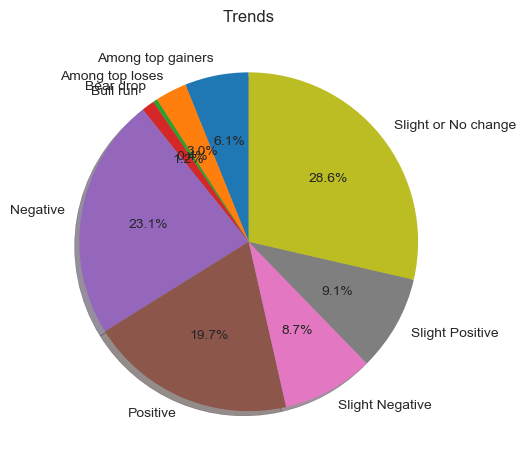

In [15]:
slices = [30, 15, 2, 6, 114, 97, 43, 45, 141]
trends = ['Among top gainers', 'Among top loses', 'Bear drop', 'Bull run', 'Negative', 'Positive', 
         'Slight Negative', 'Slight Positive', 'Slight or No change']
plt.pie(slices,
        labels=trends,
        startangle=90,
        shadow= True,
        #explode=(0,0.1,0,0)
        autopct='%1.1f%%'
       )
plt.title('Trends')
plt.show()

## Bar Graphs

### For Mean volume traded grouped by Trends

In [16]:
mean = pd.DataFrame(df.groupby(['Trend']).mean())
mean

,Unnamed: 0,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Index,Month,Year,Day_Perc_Change
Trend,,,,,,,,,,,,,,,,,
Among top gainers,230.166667,771.113333,774.250000,808.871667,770.153333,803.846667,802.478333,793.953000,2.577386e+06,2.230225e+09,55002.133333,5.118483e+05,24.136000,230.166667,6.366667,2017.800000,4.082488
Among top losers,241.466667,844.033333,840.173333,846.676667,802.876667,816.326667,814.483333,821.087333,1.674413e+06,1.371481e+09,40008.866667,4.419369e+05,27.040000,241.466667,5.333333,2017.933333,-3.552703
Bear drop,326.000000,1019.875000,985.500000,990.525000,866.725000,899.450000,892.525000,902.610000,1.113917e+07,1.020655e+10,301654.000000,1.782819e+06,16.315000,326.000000,8.500000,2018.000000,-12.656138
Bull run,212.333333,710.691667,722.825000,787.066667,718.800000,773.800000,772.358333,755.383333,5.893131e+06,4.699885e+09,106306.666667,9.150388e+05,17.595000,212.333333,4.833333,2017.833333,8.609432
Negative,241.263158,790.377632,791.000439,798.063158,769.477632,776.860088,776.950877,782.554912,1.337232e+06,1.162066e+09,34097.342105,3.303731e+05,28.802719,241.263158,6.649123,2017.824561,-1.698213
Positive,249.969072,781.746907,783.122165,802.498454,776.042784,796.101546,795.743814,791.928660,1.490484e+06,1.307579e+09,35355.639175,3.593694e+05,29.204227,249.969072,6.690722,2017.855670,1.780596
Slight Negative,249.023256,786.004651,786.627907,793.482558,771.886047,779.795349,779.891860,782.324186,1.024758e+06,8.643636e+08,26737.744186,2.541401e+05,28.546047,249.023256,6.604651,2017.860465,-0.784336
Slight Positive,263.622222,792.095556,794.252222,806.687778,787.664444,797.807778,797.807778,798.339333,1.308610e+06,1.134761e+09,30869.288889,3.447826e+05,28.733778,263.622222,6.066667,2017.955556,0.727035
Slight or No change,248.198582,755.948227,757.682979,765.102837,749.137589,756.104255,756.199291,757.315532,8.911756e+05,7.439364e+08,20974.482270,2.907617e+05,31.749078,248.198582,6.510638,2017.865248,0.022414


In [17]:
newmean = mean.reset_index()
newmean['Trend']

0      Among top gainers
1       Among top losers
2              Bear drop
3               Bull run
4               Negative
5               Positive
6        Slight Negative
7        Slight Positive
8    Slight or No change
Name: Trend, dtype: object

In [18]:
newmean['Total Traded Quantity']

0    2.577386e+06
1    1.674413e+06
2    1.113917e+07
3    5.893131e+06
4    1.337232e+06
5    1.490484e+06
6    1.024758e+06
7    1.308610e+06
8    8.911756e+05
Name: Total Traded Quantity, dtype: float64

In [19]:
x= newmean['Trend'].tolist()
y = newmean['Total Traded Quantity'].tolist()
x_pos = np.arange(len(x))

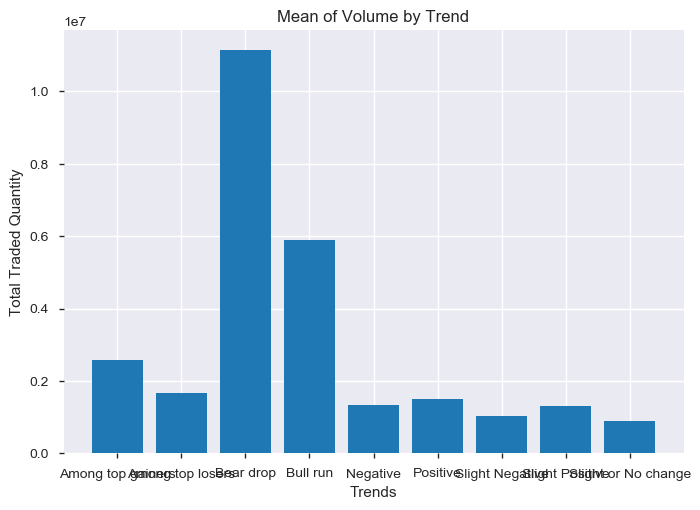

In [20]:
#main plot
plt.bar(x_pos, y)
plt.xlabel("Trends")
plt.ylabel("Total Traded Quantity")
plt.title("Mean of Volume by Trend")
plt.xticks(x_pos, x)
plt.show()

In [21]:
median = pd.DataFrame(df.groupby(['Trend']).median())
newmedian = median.reset_index()
newmedian

,Trend,Unnamed: 0,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Index,Month,Year,Day_Perc_Change
0,Among top gainers,222.5,810.000,807.600,860.550,806.850,852.50,851.600,835.38,1787215.0,1.510202e+09,45869.0,401838.0,23.580,222.5,5.5,2018.0,3.743869
1,Among top losers,211.0,843.650,839.000,842.950,809.100,813.90,812.350,823.49,1729223.0,1.317216e+09,35789.0,399006.0,24.330,211.0,5.0,2018.0,-3.499392
2,Bear drop,326.0,1019.875,985.500,990.525,866.725,899.45,892.525,902.61,11139174.5,1.020655e+10,301654.0,1782819.0,16.315,326.0,8.5,2018.0,-12.656138
3,Bull run,185.0,721.550,722.975,800.225,718.725,784.00,784.625,765.17,5782802.5,4.429253e+09,107509.5,799494.5,16.920,185.0,3.0,2018.0,8.696653
4,Negative,251.0,836.225,841.000,848.250,819.600,822.75,823.175,830.00,1005798.0,8.866096e+08,26576.0,249005.5,27.295,251.0,7.0,2018.0,-1.609268
5,Positive,267.0,837.400,840.600,859.850,830.100,853.85,854.050,851.25,1219984.0,1.058582e+09,32305.0,309307.0,26.050,267.0,7.0,2018.0,1.653364
6,Slight Negative,274.0,850.050,850.350,866.200,840.100,847.00,845.600,854.63,762140.0,6.593827e+08,22297.0,220340.0,27.010,274.0,6.0,2018.0,-0.815827
7,Slight Positive,272.0,829.950,835.000,849.400,833.100,840.25,837.100,841.13,1046434.0,9.255425e+08,26318.0,249521.0,25.040,272.0,6.0,2018.0,0.708524
8,Slight or No change,235.0,821.200,825.000,839.000,820.100,823.50,823.450,828.80,771715.0,6.101587e+08,19578.0,198703.0,27.820,235.0,6.0,2018.0,0.043966


In [22]:
x = newmedian['Trend']
y = newmedian['Total Traded Quantity']
x_pos = np.arange(len(x))

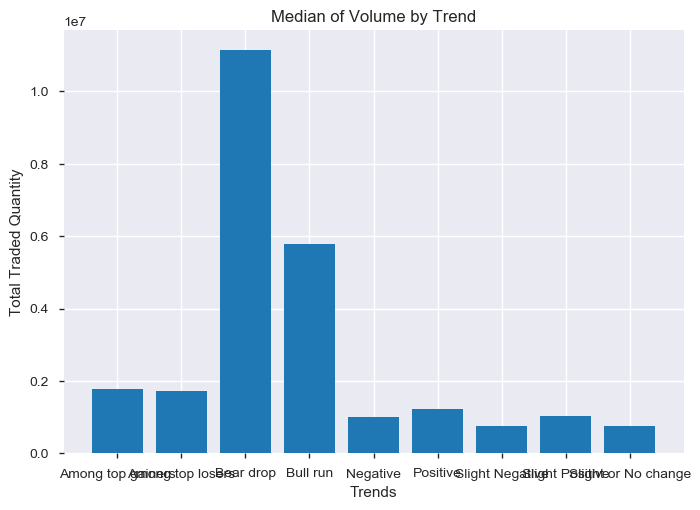

In [23]:
#main plot
plt.bar(x_pos, y)
plt.xlabel("Trends")
plt.ylabel("Total Traded Quantity")
plt.title("Median of Volume by Trend")
plt.xticks(x_pos, x)
plt.show()

# Problem Statement 2.5
Plot the daily return (percentage) distribution as a histogram.
Histogram analysis is one of the most fundamental methods of exploratory data analysis. In this case, it'd return a frequency plot of various values of percentage changes .

In [24]:
# to remove the redundant column
df = pd.read_csv('D:/DS/mindtree_updated.csv', index_col=[0])

In [25]:
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Index,Month,Year,Day_Perc_Change,Trend
1,MINDTREE,EQ,2017-05-16,509.45,507.00,515.85,506.00,511.00,511.30,512.69,207011,1.061317e+08,5550,82090,39.65,1,5,2017,0.363137,Slight or No change
2,MINDTREE,EQ,2017-05-17,511.30,507.05,519.70,502.75,504.00,506.35,512.10,391401,2.004375e+08,13341,150098,38.35,2,5,2017,-0.968120,Slight Negative
3,MINDTREE,EQ,2017-05-18,506.35,502.00,516.75,486.00,487.50,492.90,505.60,852336,4.309377e+08,18513,170919,20.05,3,5,2017,-2.656265,Negative
4,MINDTREE,EQ,2017-05-19,492.90,491.95,502.95,489.50,495.15,497.50,496.43,352273,1.748782e+08,8326,57853,16.42,4,5,2017,0.933252,Slight Positive
5,MINDTREE,EQ,2017-05-22,497.50,499.95,511.85,497.10,501.55,502.35,504.78,399974,2.018999e+08,9779,107089,26.77,5,5,2017,0.974874,Slight Positive


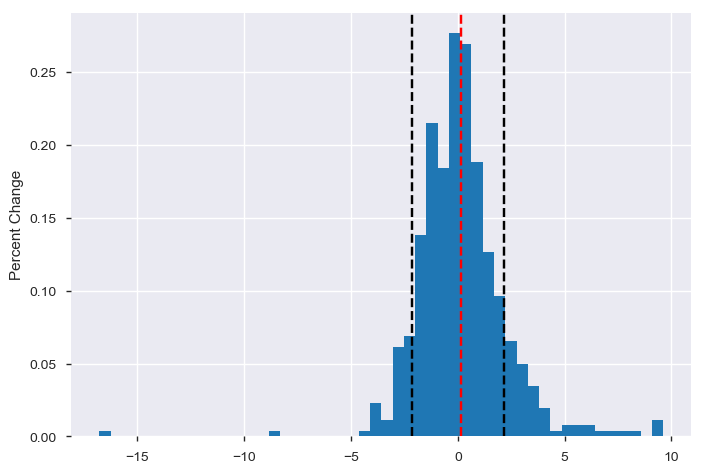

In [26]:
df['Day_Perc_Change'].hist(bins = 50, density = True)
plt.ylabel('Percent Change')
mean = df['Day_Perc_Change'].mean()
std = df['Day_Perc_Change'].std()
plt.axvline(x=mean, color='r', linestyle='--')
plt.axvline(x=std, color='k', linestyle='--')
plt.axvline(x=-std, color='k', linestyle='--')
plt.show()

# Problem Statement 2.6

We next want to analyse how the behaviour of different stocks are correlated. The correlation is performed on the percentage change of the stock price instead of the stock price.
Load any 5 stocks of your choice into 5 dataframes. Retain only rows for which ‘Series’ column has value ‘EQ’. Create a single dataframe which contains the ‘Closing Price’ of each stock. This dataframe should hence have five columns. Rename each column to the name of the stock that is contained in the column. Create a new dataframe which is a percentage change of the values in the previous dataframe. Drop Nan’s from this dataframe.
Using seaborn, analyse the correlation between the percentage changes in the five stocks.

In [27]:
ashoka = pd.read_csv('D:/DS/ASHOKA.csv')
suzlon = pd.read_csv('D:/DS/SUZLON.csv')
jet = pd.read_csv('D:/DS/JETAIRWAYS.csv')
fortis = pd.read_csv('D:/DS/FORTIS.csv')
raymond = pd.read_csv('D:/DS/RAYMOND.csv')

In [28]:
ashoka.sample(10)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
44,ASHOKA,EQ,17-Jul-2017,190.95,190.05,192.00,188.00,188.00,188.50,188.95,17269,3.262907e+06,375,10791,62.49
49,ASHOKA,EQ,24-Jul-2017,188.05,189.50,189.50,183.65,185.50,184.80,185.19,295727,5.476682e+07,1638,270493,91.47
435,ASHOKA,EQ,12-Feb-2019,112.60,112.50,113.25,110.30,111.50,111.10,111.48,30160,3.362169e+06,1246,15782,52.33
89,ASHOKA,EQ,20-Sep-2017,193.10,194.40,197.60,193.45,196.00,196.05,195.56,67947,1.328786e+07,2469,41481,61.05
356,ASHOKA,EQ,19-Oct-2018,113.95,112.90,113.95,108.00,111.80,112.55,111.33,78411,8.729515e+06,1932,23138,29.51
222,ASHOKA,EQ,05-Apr-2018,260.00,264.00,264.95,260.00,262.70,262.15,262.51,347340,9.118189e+07,22559,147550,42.48
125,ASHOKA,EQ,13-Nov-2017,218.90,214.00,216.00,206.25,207.25,207.35,212.71,3384806,7.199972e+08,6016,3021214,89.26
32,ASHOKA,EQ,29-Jun-2017,183.65,186.35,188.00,182.00,186.70,186.65,185.25,364933,6.760274e+07,2190,327188,89.66
306,ASHOKA,EQ,02-Aug-2018,146.15,146.85,148.10,145.05,145.65,145.85,146.47,69269,1.014605e+07,1457,32416,46.80
445,ASHOKA,EQ,26-Feb-2019,119.05,117.75,117.75,112.60,116.80,116.40,115.84,68457,7.929747e+06,1762,28791,42.06


#### Removal of rows where Series Columns != EQ

In [29]:
ashoka = ashoka[ashoka.Series == 'EQ']
suzlon = suzlon[suzlon.Series == 'EQ']
jet = jet[jet.Series == 'EQ']
fortis = fortis[fortis.Series == 'EQ']
raymond = raymond[raymond.Series == 'EQ']

In [30]:
close_price = pd.DataFrame(ashoka['Close Price'])

In [31]:
close_price.head()

,Close Price
0,216.05
1,214.90
2,217.00
3,209.65
4,206.25


In [32]:
close_price['Ashoka'] = ashoka['Close Price']
close_price['Suzlon'] = suzlon['Close Price']
close_price['Jet Airways'] = jet['Close Price']
close_price['Fortis'] = fortis['Close Price']
close_price['Raymond'] = raymond['Close Price']

#### Creation of new dataframe with close values of the 5 stocks

In [33]:
close_price.head()

,Close Price,Ashoka,Suzlon,Jet Airways,Fortis,Raymond
0,216.05,216.05,19.6,527.50,205.25,772.80
1,214.90,214.90,19.7,534.15,207.90,785.00
2,217.00,217.00,19.9,528.90,205.90,783.65
3,209.65,209.65,20.0,522.70,196.85,746.95
4,206.25,206.25,20.6,520.40,203.55,723.10


In [34]:
del close_price['Close Price']

In [35]:
close_price.shape

(494, 5)

#### Calulate percent change values 

In [36]:
perchange_closeprice = close_price.pct_change()

In [37]:
perchange_closeprice.head()

,Ashoka,Suzlon,Jet Airways,Fortis,Raymond
0,NaN,NaN,NaN,NaN,NaN
1,-0.005323,0.005102,0.012607,0.012911,0.015787
2,0.009772,0.010152,-0.009829,-0.009620,-0.001720
3,-0.033871,0.005025,-0.011722,-0.043953,-0.046832
4,-0.016218,0.030000,-0.004400,0.034036,-0.031930


#### Removal of NaN Row

In [38]:
perchange_closeprice.drop(perchange_closeprice.index[0]).head()

,Ashoka,Suzlon,Jet Airways,Fortis,Raymond
1,-0.005323,0.005102,0.012607,0.012911,0.015787
2,0.009772,0.010152,-0.009829,-0.009620,-0.001720
3,-0.033871,0.005025,-0.011722,-0.043953,-0.046832
4,-0.016218,0.030000,-0.004400,0.034036,-0.031930
5,-0.022545,-0.009709,-0.085992,-0.042987,-0.009888


#### Correlation Analysis

In [39]:
import seaborn as sns

C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Atheesh Krishnan\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


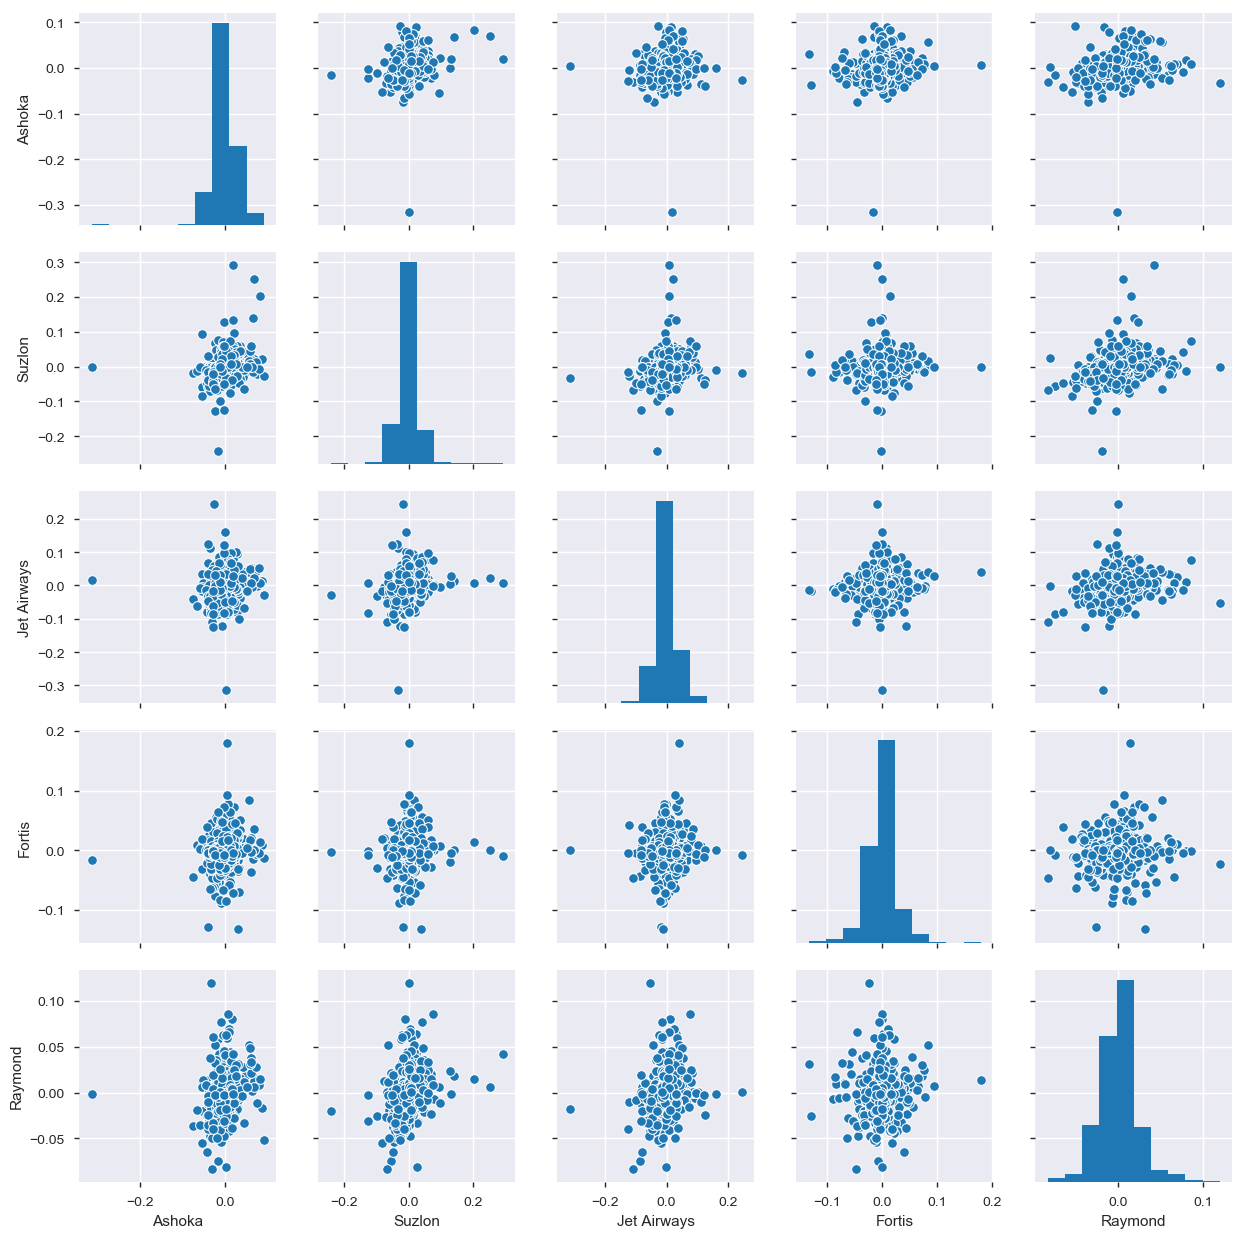

In [40]:
sns.pairplot(perchange_closeprice)

# Problem Statement 2.7

Volatility is the change in variance in the returns of a stock over a specific period of time. You have already calculated the percentage changes in several stock prices. Calculate the 7 day rolling average of the percentage change of any of the stock prices, then compute the standard deviation (which is the square root of the variance) and plot the values.
Note: pandas provides a rolling() function for dataframes and a std() function also which you can use. 

In [41]:
volatility = pd.DataFrame(perchange_closeprice['Ashoka'].rolling(7).mean())
volatility['Suzlon'] = perchange_closeprice['Suzlon'].rolling(7).mean()
volatility['Jet Airways'] = perchange_closeprice['Jet Airways'].rolling(7).mean()
volatility['Fortis'] = perchange_closeprice['Fortis'].rolling(7).mean()
volatility['Raymond'] = perchange_closeprice['Raymond'].rolling(7).mean()

In [42]:
volatility.sample(10)

,Ashoka,Suzlon,Jet Airways,Fortis,Raymond
412,0.009680,0.000136,-0.020193,-0.001325,-0.005733
44,0.001018,0.001231,0.004682,0.001686,-0.003278
50,-0.004454,0.000162,-0.006925,0.003442,0.002658
7,-0.013732,-0.005266,-0.017464,-0.007403,-0.021544
297,-0.063497,-0.007549,-0.015087,-0.002762,-0.016444
375,0.004081,-0.010773,0.047812,0.002929,0.004469
487,-0.010023,-0.000606,-0.016520,-0.002612,0.001113
376,0.005215,-0.019436,0.036437,0.005256,0.005053
455,0.021481,0.025001,0.004179,0.007445,0.004262
393,0.002470,-0.005109,-0.025673,0.004846,0.009419


#### Standard Deviation of percentage change in closing prices

In [43]:
perchange_closeprice.std()

Ashoka         0.027905
Suzlon         0.037391
Jet Airways    0.039362
Fortis         0.026526
Raymond        0.022919
dtype: float64

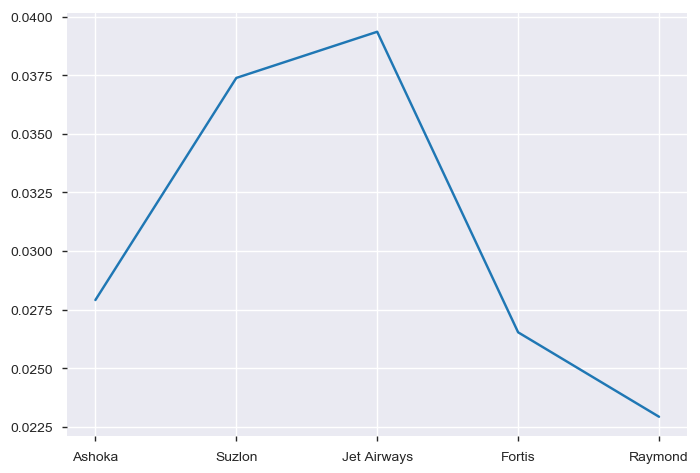

In [44]:
plt.plot(perchange_closeprice.std())

#### Plotting the volatility of the stocks

In [45]:
ashoka_vol = perchange_closeprice['Ashoka'].tolist()
suzlon_vol = perchange_closeprice['Suzlon'].tolist()
jet_vol = perchange_closeprice['Jet Airways'].tolist()
fortis_vol = perchange_closeprice['Fortis'].tolist()
raymond_vol = perchange_closeprice['Raymond'].tolist()

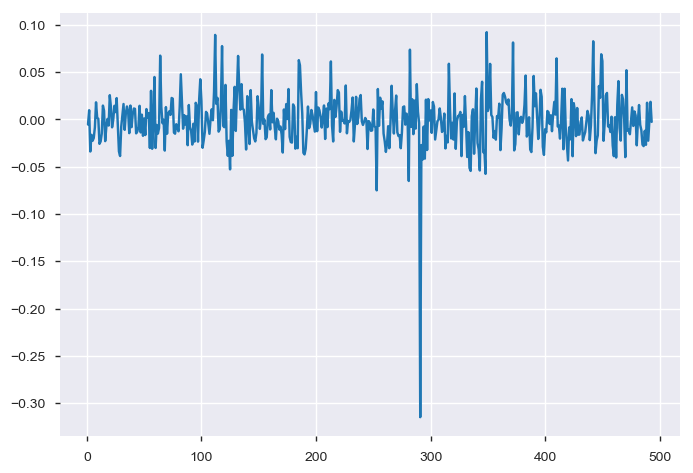

In [46]:
plt.plot(ashoka_vol)

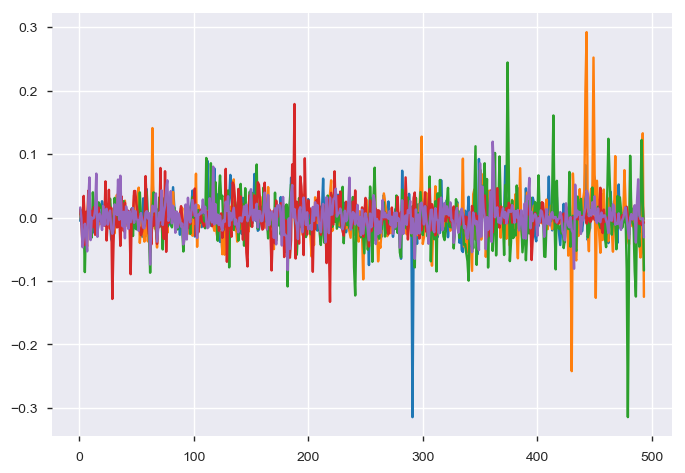

In [47]:
plt.plot(ashoka_vol)
plt.plot(suzlon_vol)
plt.plot(jet_vol)
plt.plot(fortis_vol)
plt.plot(raymond_vol)

# Problem Statement 2.8

Calculate the volatility for the Nifty index and compare the 2.

In [48]:
nifty = pd.read_csv('D:/DS/Nifty50.csv')

In [49]:
nifty.sample(5)

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
69,22-Aug-2017,9815.75,9828.45,9752.60,9765.55,189267122,9850.89
484,26-Apr-2019,11683.75,11762.90,11661.75,11754.65,333483764,18098.83
228,13-Apr-2018,10495.30,10519.90,10451.45,10480.60,219724716,12354.55
297,20-Jul-2018,10963.50,11030.25,10946.20,11010.20,193144113,14105.94
23,15-Jun-2017,9617.90,9621.40,9560.80,9578.05,176423424,9868.08


In [50]:
nifty_closeprice = pd.DataFrame(nifty['Close'])

In [51]:
nifty_closeprice.head()

,Close
0,9445.40
1,9512.25
2,9525.75
3,9429.45
4,9427.90


In [52]:
perchange_nifty_closeprice = nifty_closeprice.pct_change()

In [53]:
perchange_nifty_closeprice.head()

,Close
0,NaN
1,0.007078
2,0.001419
3,-0.010109
4,-0.000164


In [54]:
perchange_nifty_closeprice.drop(nifty_closeprice.index[0]).head()

,Close
1,0.007078
2,0.001419
3,-0.010109
4,-0.000164
5,0.001098


#### Std deviation of NIFTY50

In [55]:
perchange_nifty_closeprice.std()

Close    0.007206
dtype: float64

In [56]:
nifty_vol = pd.DataFrame(perchange_nifty_closeprice['Close']).rolling(7).mean()

In [57]:
nifty_vol.sample(5)

,Close
456,0.004577
162,-0.000351
121,0.000391
247,0.001189
425,-0.003357


In [58]:
#nifty_vol['Close'].tolist()

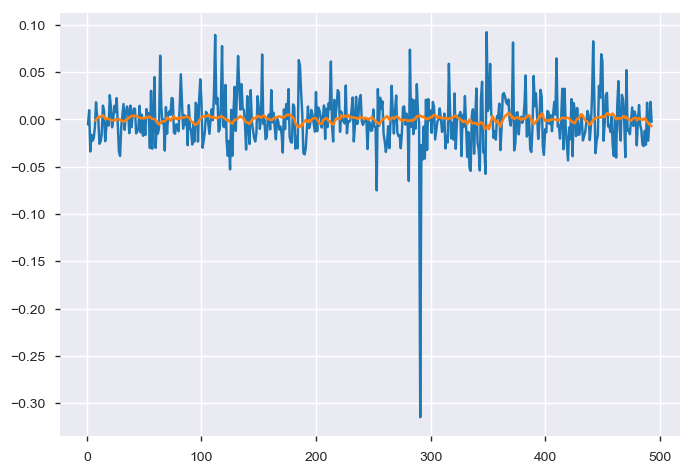

In [59]:
plt.plot(ashoka_vol)
plt.plot(nifty_vol)

# Problem Statement 2.8

Trade Calls - Using Simple Moving Averages. Plot the 21 day and 34 day Moving average with the average price and decide a Call. Call should be buy whenever the smaller moving average (21) crosses over longer moving average (34) AND the call should be sell whenever smaller moving average crosses under longer moving average.
One of the most widely used technical indicators.

In [60]:
a = pd.DataFrame(perchange_closeprice['Ashoka'].rolling(21).mean())
b = pd.DataFrame(perchange_closeprice['Ashoka'].rolling(34).mean())

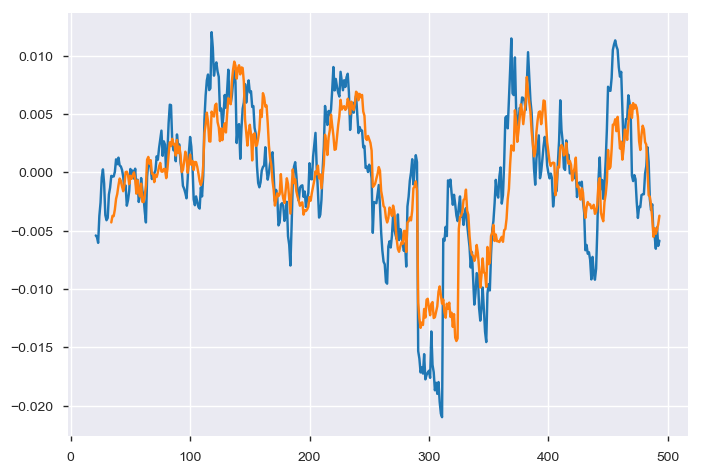

In [61]:
plt.plot(a)
plt.plot(b)

In [62]:
a.sample(5)

,Ashoka
137,0.008720
319,-0.001820
381,0.005335
88,0.000947
13,NaN


In [63]:
a.rename(columns={'Ashoka': 'Ashoka(21)'}, inplace=True)

In [64]:
b.sample(5)

,Ashoka
317,-0.011167
26,NaN
438,-0.002790
447,-0.002557
147,0.003373


In [65]:
b.rename(columns={'Ashoka': 'Ashoka(34)'}, inplace=True)

In [66]:
ashoka_ab = pd.concat([a, b], axis=1)

In [67]:
ashoka_ab.sample(5)

,Ashoka(21),Ashoka(34)
35,-0.000353,-0.003735
19,NaN,NaN
371,0.006611,0.001854
217,0.004904,0.003619
262,-0.007657,-0.002896


#### Attribution of Buy/Sell signals.

In [68]:
ashoka_ab['Call'] = np.where((ashoka_ab['Ashoka(21)'] > ashoka_ab['Ashoka(34)']), 'Buy', 'Sell')

In [69]:
ashoka_ab.sample(5)

,Ashoka(21),Ashoka(34),Call
276,-0.004867,-0.006361,Buy
437,-0.007248,-0.003049,Sell
258,-0.001090,0.000446,Sell
322,-0.002730,-0.014162,Buy
134,0.005882,0.005833,Buy


# Problem Statement 2.10

Trade Calls - Using Bollinger Bands
Plot the bollinger bands for this stock - the duration of 14 days and 2 standard deviations away from the average.
The bollinger bands comprise the following data points-

    1. The 14 day rolling mean of the closing price (we call it the average) 
    2. Upper band which is the rolling mean + 2 standard deviations away from the average. 
    3. Lower band which is the rolling mean - 2 standard deviations away from the average. 
    4. Average Daily stock price.

Bollinger bands are extremely reliable , with a 95% accuracy at 2 standard deviations , and especially useful in sideways moving market.
Observe the bands yourself, and analyse the accuracy of all the trade signals provided by the bollinger bands.
Save to a new csv file. 

In [70]:
x = ashoka['Close Price'].rolling(14).mean()

In [71]:
x.tail(5)

489    126.021429
490    124.917857
491    123.867857
492    122.892857
493    121.857143
Name: Close Price, dtype: float64

In [72]:
ashoka_std = ashoka['Close Price'].std()
ashoka_std

51.895652545078846

In [73]:
y1 = x + ashoka_std

In [74]:
y1.tail(5)

489    177.917081
490    176.813510
491    175.763510
492    174.788510
493    173.752795
Name: Close Price, dtype: float64

In [75]:
y2 = x - ashoka_std

In [76]:
y2.tail(5)

489    74.125776
490    73.022205
491    71.972205
492    70.997205
493    69.961490
Name: Close Price, dtype: float64

In [77]:
z = ashoka['Average Price'].tolist()

### Plotting the Bollinger Bands 

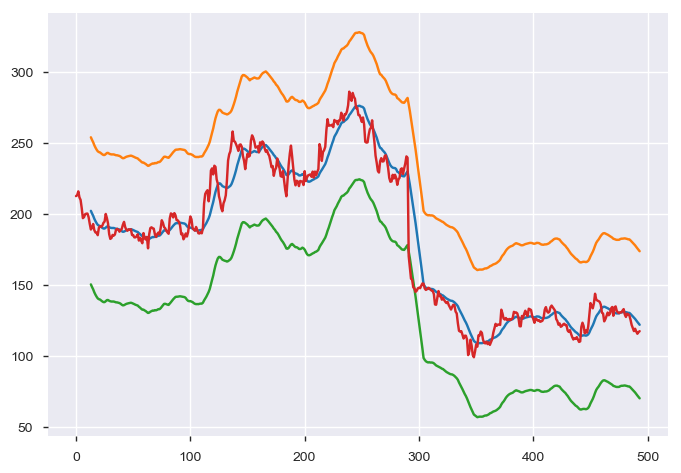

In [78]:
plt.plot(x)
plt.plot(y1)
plt.plot(y2)
plt.plot(z)